# Task 1 : Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.decomposition import PCA
%matplotlib inline
# Retina
%config InlineBackend.figure_format = 'retina'

In [3]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = "D:\\Code\\ML\\fork-it\\Combined"
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [4]:
laying_sample = pd.read_csv(os.path.join("Combined","Test","LAYING","Subject_9.csv"))
sitting_sample = pd.read_csv(os.path.join("Combined","Test","SITTING","Subject_9.csv"))
standing_sample = pd.read_csv(os.path.join("Combined","Test","STANDING","Subject_13.csv"))
walking_sample = pd.read_csv(os.path.join("Combined","Test","WALKING","Subject_24.csv"))
walking_downstairs_sample = pd.read_csv(os.path.join("Combined","Test","WALKING_DOWNSTAIRS","Subject_9.csv"))
walking_upstairs_sample = pd.read_csv(os.path.join("Combined","Test","WALKING_UPSTAIRS","Subject_10.csv"))

laying_sample['acc_norm'] = np.sqrt(laying_sample['accx']**2 + laying_sample['accy']**2 + laying_sample['accz']**2)
sitting_sample['acc_norm'] = np.sqrt(sitting_sample['accx']**2 + sitting_sample['accy']**2 + sitting_sample['accz']**2)
standing_sample['acc_norm'] = np.sqrt(standing_sample['accx']**2 + standing_sample['accy']**2 + standing_sample['accz']**2)
walking_sample['acc_norm'] = np.sqrt(walking_sample['accx']**2 + walking_sample['accy']**2 + walking_sample['accz']**2)
walking_downstairs_sample['acc_norm'] = np.sqrt(walking_downstairs_sample['accx']**2 + walking_downstairs_sample['accy']**2 + walking_downstairs_sample['accz']**2)
walking_upstairs_sample['acc_norm'] = np.sqrt(walking_upstairs_sample['accx']**2 + walking_upstairs_sample['accy']**2 + walking_upstairs_sample['accz']**2)

In [5]:
print(X_train)

[[[ 1.19648    -0.1606898  -0.740178  ]
  [ 1.22203    -0.2672951  -0.7717485 ]
  [ 1.22311    -0.4338634  -0.7678422 ]
  ...
  [ 0.4974957  -0.2795907  -0.2029592 ]
  [ 0.5064167  -0.286091   -0.2564634 ]
  [ 0.5609918  -0.302237   -0.2553743 ]]

 [[ 0.253887    0.6446213   0.7305601 ]
  [ 0.2547409   0.6470096   0.7330282 ]
  [ 0.256914    0.6468081   0.7354798 ]
  ...
  [ 0.2489302   0.642803    0.7323693 ]
  [ 0.2503708   0.6447095   0.7369245 ]
  [ 0.2513104   0.6440663   0.735841  ]]

 [[ 0.9736077  -0.1844755  -0.2821974 ]
  [ 0.9760866  -0.1867793  -0.2848794 ]
  [ 0.977865   -0.191836   -0.2891687 ]
  ...
  [ 0.9779202  -0.1834941  -0.2829651 ]
  [ 0.9796224  -0.1832831  -0.279844  ]
  [ 0.9775468  -0.1833646  -0.2764387 ]]

 ...

 [[ 0.1943966   0.5317094   0.834933  ]
  [ 0.1938159   0.5319046   0.8337903 ]
  [ 0.1907567   0.5332984   0.8291312 ]
  ...
  [ 0.188955    0.5606699   0.8099954 ]
  [ 0.186853    0.5615242   0.8113412 ]
  [ 0.1877281   0.5637395   0.8163374 ]]

 [

In [29]:
# sns.set_palette("pastel")
# sns.set_style("darkgrid")
# # Create subplots
# fig, axes = plt.subplots(6, 1, figsize=(12, 24))
# plt.subplots_adjust(hspace=0.4)

# # Define a common line width for consistency
# line_width = 2.0

# # Plot data with customizations
# sns.lineplot(data=laying_sample["acc_norm"], ax=axes[0], linewidth=line_width)
# axes[0].set_title("Laying", fontsize=16, weight='bold')
# axes[0].set_xlabel("Time", fontsize=14)
# axes[0].set_ylabel("Acceleration", fontsize=14)

# sns.lineplot(data=sitting_sample["acc_norm"], ax=axes[1], linewidth=line_width)
# axes[1].set_title("Sitting", fontsize=16, weight='bold')
# axes[1].set_xlabel("Time", fontsize=14)
# axes[1].set_ylabel("Acceleration", fontsize=14)

# sns.lineplot(data=standing_sample["acc_norm"], ax=axes[2], linewidth=line_width)
# axes[2].set_title("Standing", fontsize=16, weight='bold')
# axes[2].set_xlabel("Time", fontsize=14)
# axes[2].set_ylabel("Acceleration", fontsize=14)

# sns.lineplot(data=walking_sample["acc_norm"], ax=axes[3], linewidth=line_width)
# axes[3].set_title("Walking", fontsize=16, weight='bold')
# axes[3].set_xlabel("Time", fontsize=14)
# axes[3].set_ylabel("Acceleration", fontsize=14)

# sns.lineplot(data=walking_downstairs_sample["acc_norm"], ax=axes[4], linewidth=line_width)
# axes[4].set_title("Walking Downstairs", fontsize=16, weight='bold')
# axes[4].set_xlabel("Time", fontsize=14)
# axes[4].set_ylabel("Acceleration", fontsize=14)

# sns.lineplot(data=walking_upstairs_sample["acc_norm"], ax=axes[5], linewidth=line_width)
# axes[5].set_title("Walking Upstairs", fontsize=16, weight='bold')
# axes[5].set_xlabel("Time", fontsize=14)
# axes[5].set_ylabel("Acceleration", fontsize=14)

# # Apply tight layout for better spacing
# plt.tight_layout()

# # Display the plots
# plt.show()

In [5]:
#Issues in Laying
#2, 10, 18
#Issues in Sitting
#2, 4, (9), 10, 12, 13, 18, (20), (24)
#Issues in Standing
#(2), (4), (9), 10, (12), (13), 18, (20), (24)
#Issues in Walking
#(24), 4
#Issues in Walking Upstairs
#20, 9

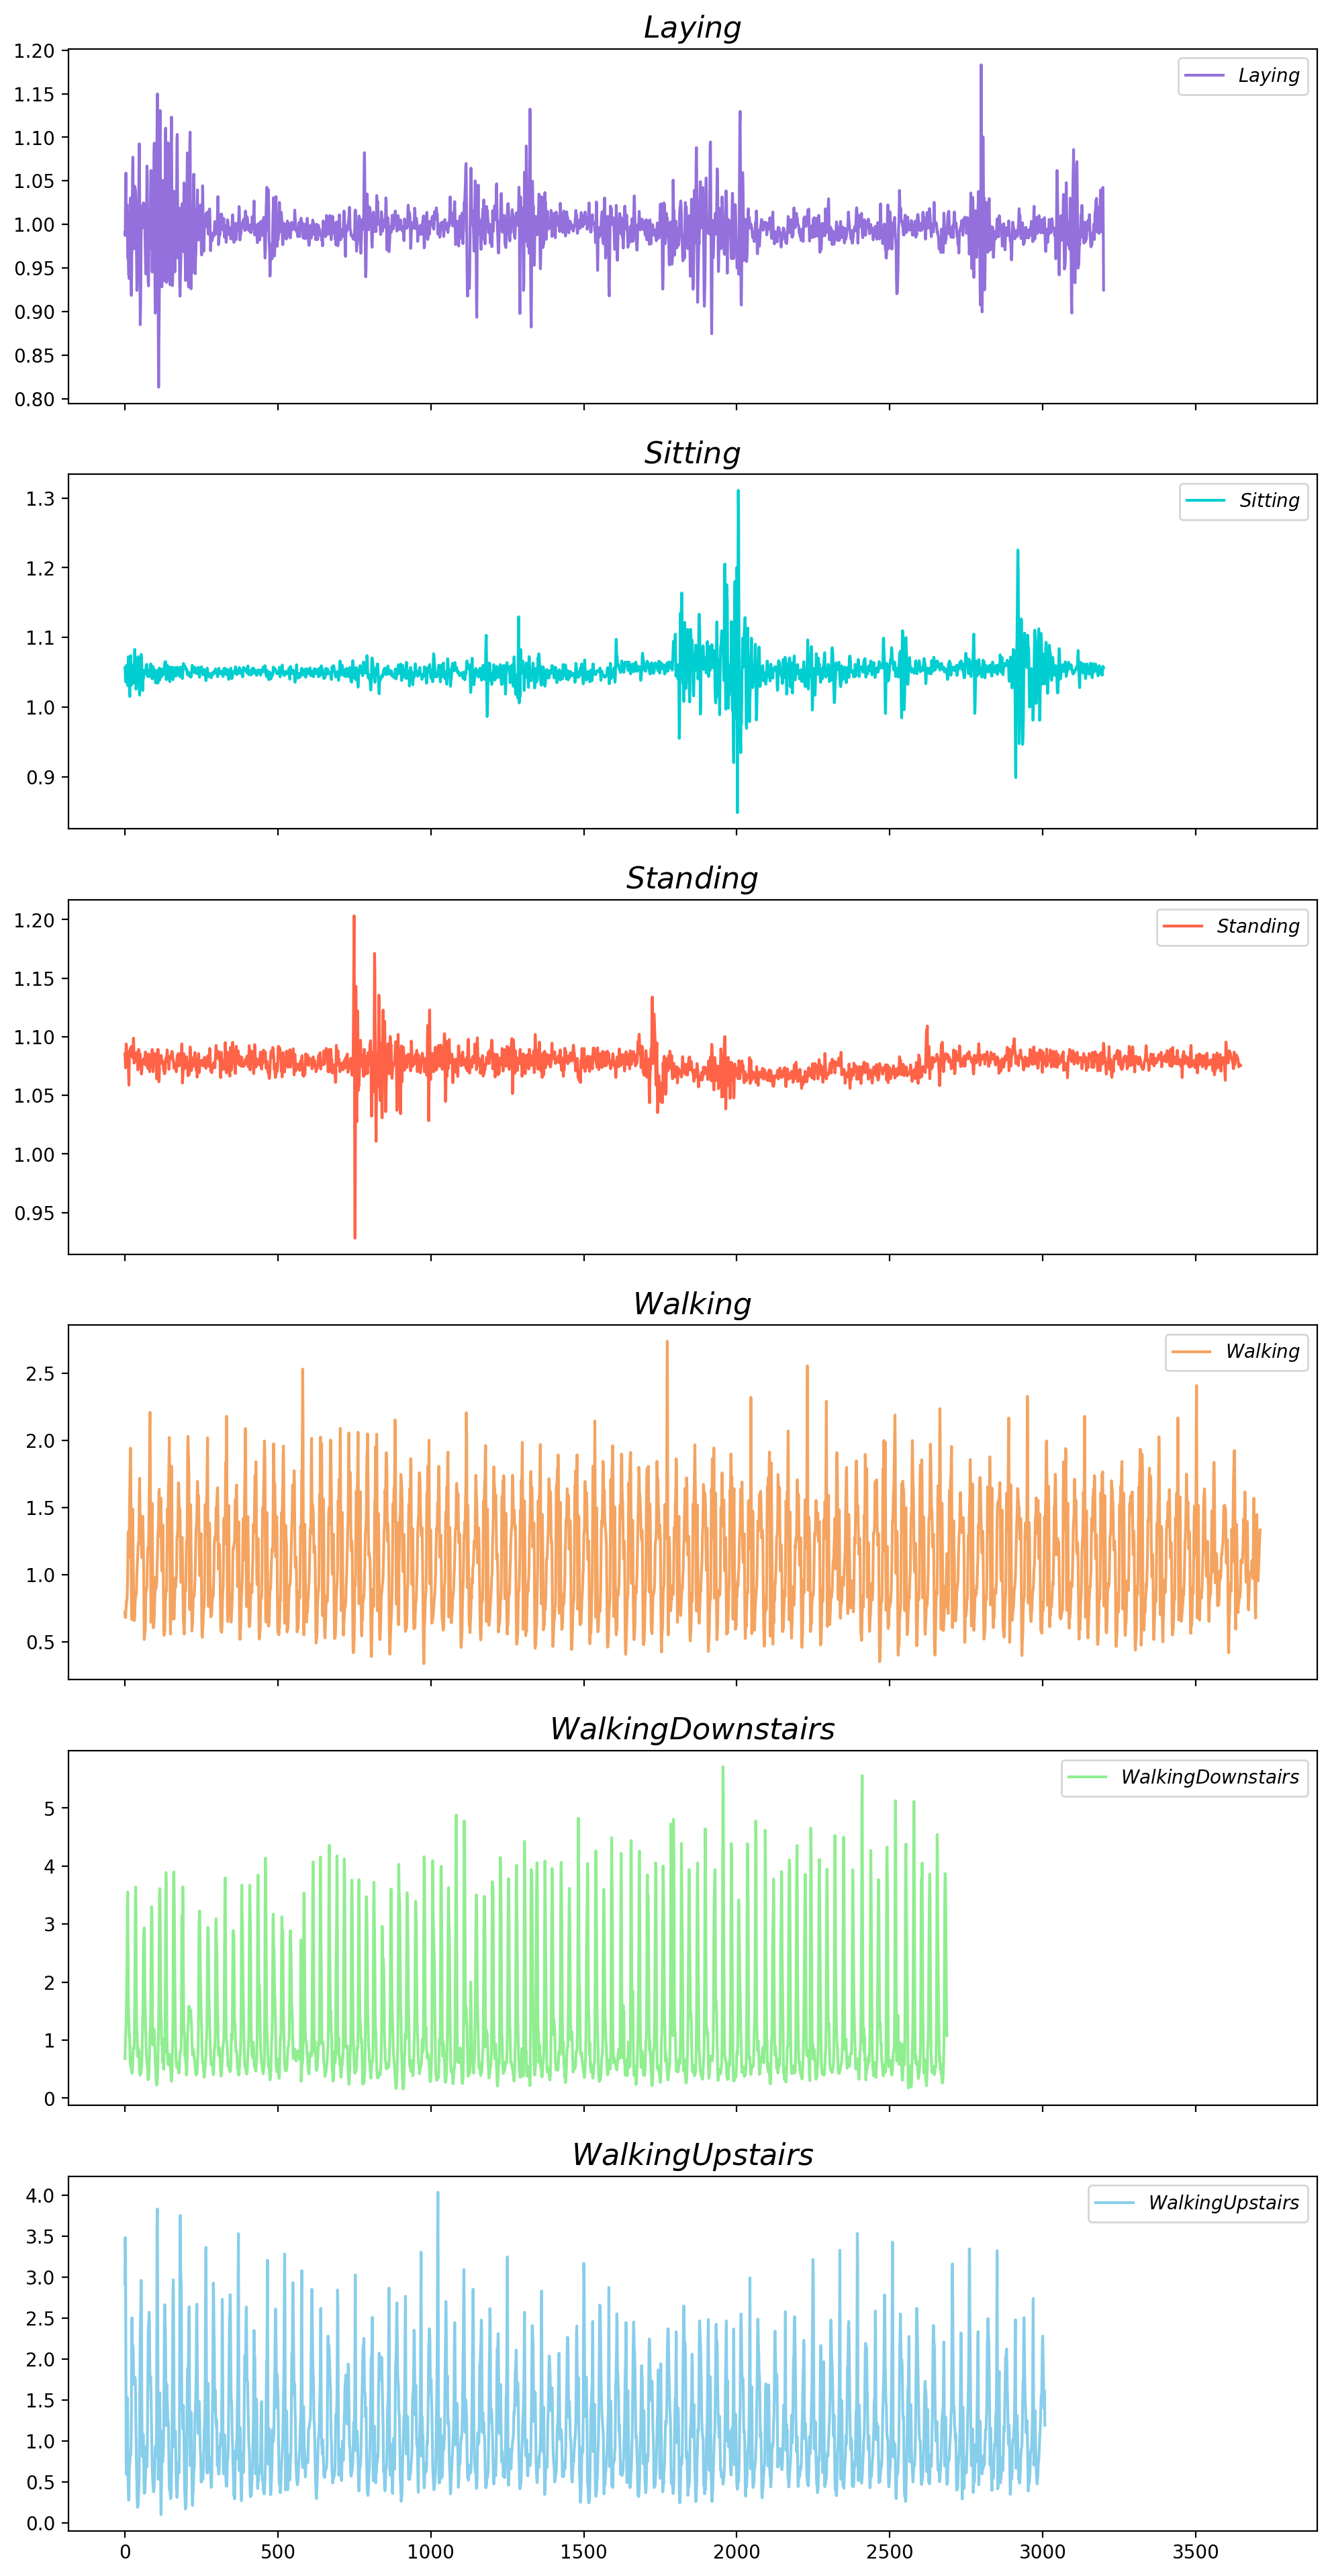

In [5]:
laying_lacc = laying_sample['accx']**2 + laying_sample['accy']**2 + laying_sample['accz']**2
sitting_lacc = sitting_sample['accx']**2 + sitting_sample['accy']**2 + sitting_sample['accz']**2
standing_lacc = standing_sample['accx']**2 + standing_sample['accy']**2 + standing_sample['accz']**2
walking_lacc = walking_sample['accx']**2 + walking_sample['accy']**2 + walking_sample['accz']**2
walking_downstairs_lacc = walking_downstairs_sample['accx']**2 + walking_downstairs_sample['accy']**2 + walking_downstairs_sample['accz']**2
walking_upstairs_lacc = walking_upstairs_sample['accx']**2 + walking_upstairs_sample['accy']**2 + walking_upstairs_sample['accz']**2

fig, ax = plt.subplots(6, 1, figsize=(12, 24), sharex=True)
ax[0].plot(laying_lacc, label='$Laying$', color='mediumpurple', antialiased = True)
ax[0].set_title("$Laying$", fontsize=16, weight='bold')
ax[0].legend(loc="upper right")
ax[1].plot(sitting_lacc, label='$Sitting$', color='darkturquoise', antialiased = True)
ax[1].set_title("$Sitting$", fontsize=16, weight='bold')
ax[1].legend(loc="upper right")
ax[2].plot(standing_lacc, label='$Standing$', color='tomato', antialiased = True)
ax[2].set_title("$Standing$", fontsize=16, weight='bold')
ax[2].legend(loc="upper right")
ax[3].plot(walking_lacc, label='$Walking$', color='sandybrown', antialiased = True)
ax[3].set_title("$Walking$", fontsize=16, weight='bold')
ax[3].legend(loc="upper right")
ax[4].plot(walking_downstairs_lacc, label='$Walking Downstairs$', color='lightgreen', antialiased = True)
ax[4].set_title("$Walking Downstairs$", fontsize=16, weight='bold')
ax[4].legend(loc="upper right")
ax[5].plot(walking_upstairs_lacc, label='$Walking Upstairs$', color='skyblue', antialiased = True)
ax[5].set_title("$Walking Upstairs$", fontsize=16, weight='bold')
ax[5].legend(loc="upper right")
plt.show()



(126, 2)


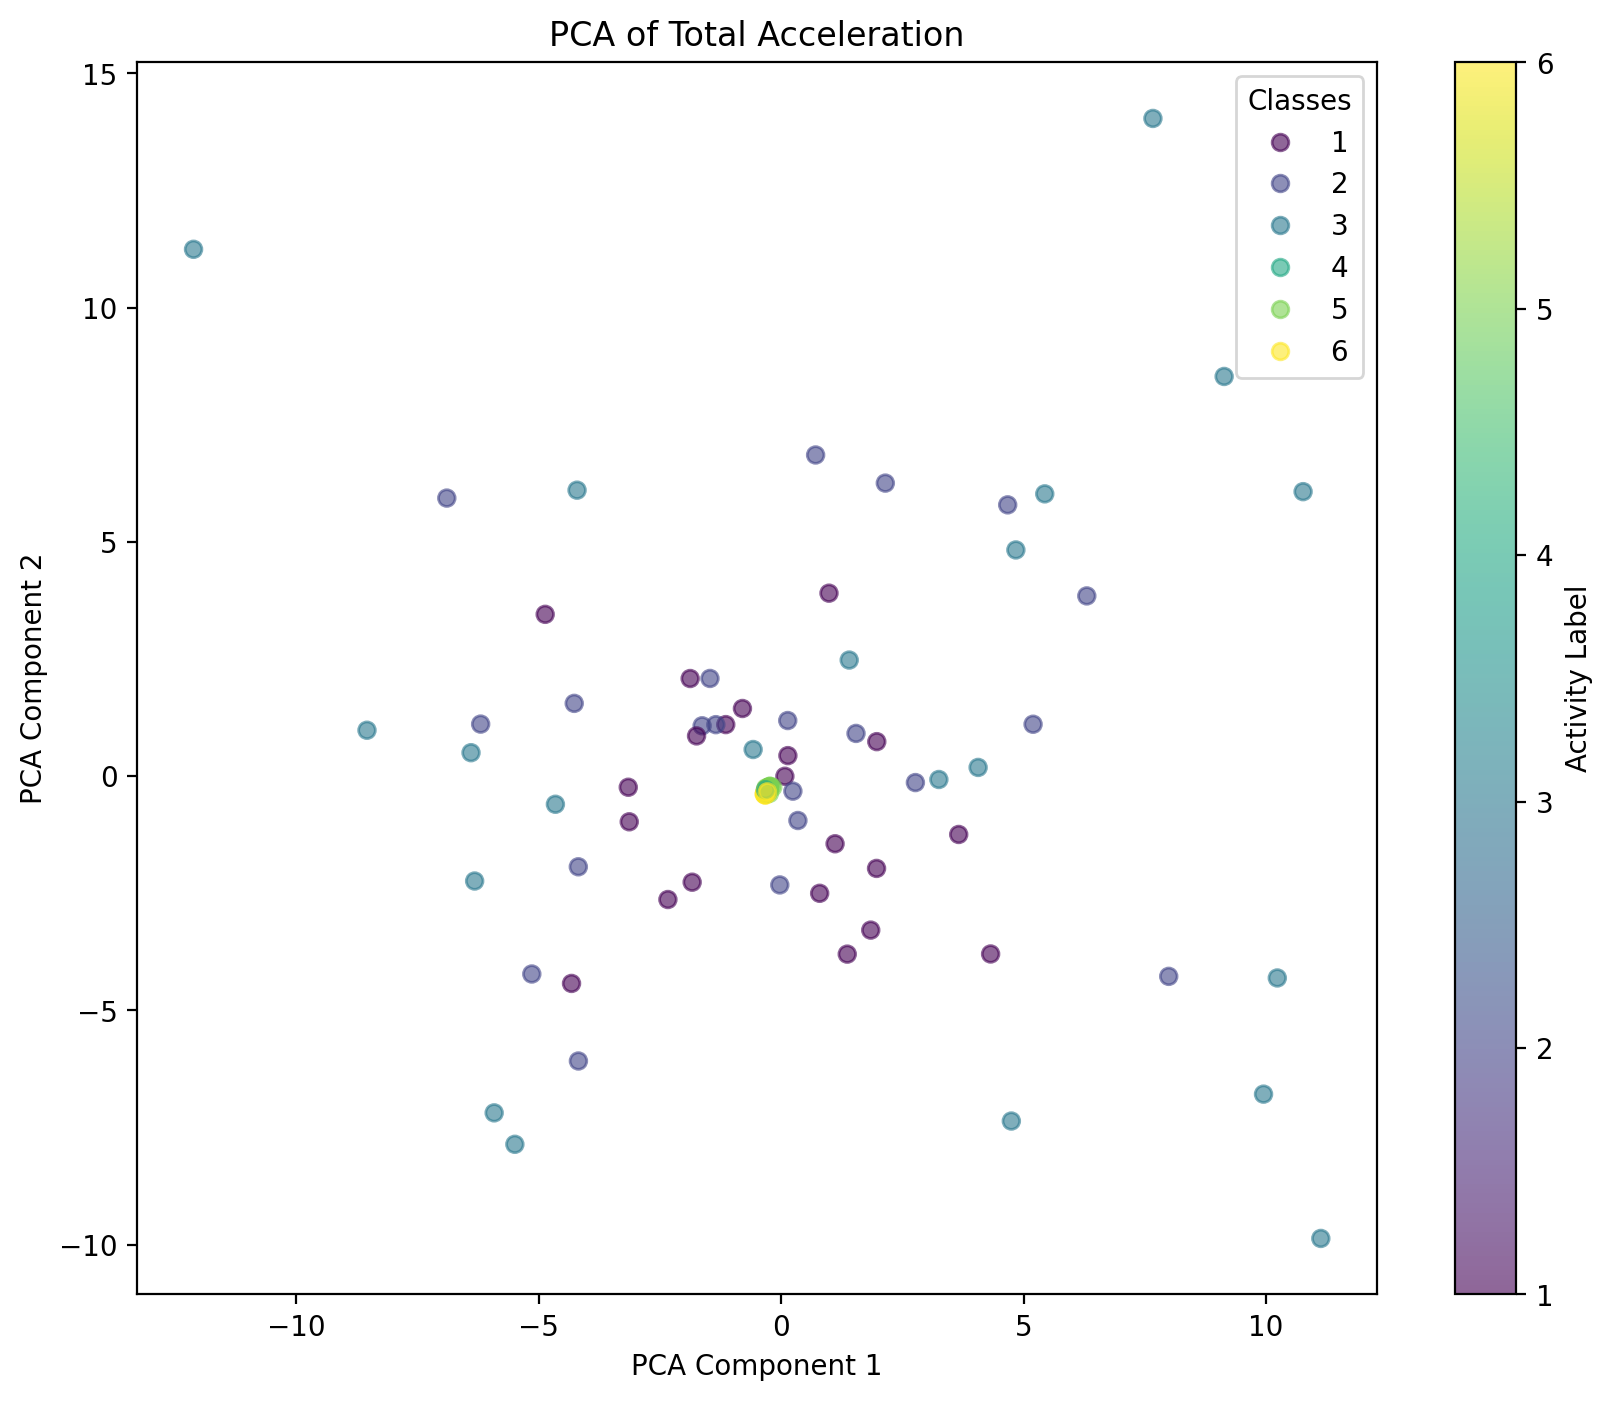

In [15]:
pca = PCA(n_components = 2)
lacc = (X_train[ :, :,0]**2 + X_train[ :, :,1]**2 + X_train[ :, :,2]**2)

pca_lacc = pca.fit_transform(lacc)
print(pca_lacc.shape)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_lacc[:, 0], pca_lacc[:, 1], c=y_train, alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Activity Label')
plt.legend(*scatter.legend_elements(), title= 'Classes')
plt.title('PCA of Total Acceleration')
plt.show()